# Machine Learning
# Lista de Exercícios 1
# Prof. Neylson Crepalde
# Aluno: José Marinheiro Neto
# ISLR Questão 8(a)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

In [2]:
auto = pd.DataFrame.from_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
auto.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
mpg,,,,,,,,
18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.describe()

,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto.shape

(397, 8)

In [6]:
# Removendo valores inúteis

auto = auto.drop(auto[auto.values == '?'].index)
auto = auto.reset_index()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
# Vamos converter os dados de quantitativos para numéricos
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year'],
             'qual': ['origin', 'name']}

quants = auto[datatypes['quant']].astype(np.float_)

auto = pd.concat([quants, auto[datatypes['qual']]], axis=1)

In [8]:
# Vamos fazer a regressão liner utilizando numpy

intercept_const = pd.DataFrame({'intercept': np.ones(auto.shape[0])})

X = pd.concat([intercept_const, auto['horsepower']], axis=1)
y = auto['mpg']

## Método para estimativa dos parâmetros da regressão linear com base em OLS

def linear_model(X, y):

    XTX_inv = np.linalg.inv(X.T @ X)
    XTy     = X.T @ y
    beta    = XTX_inv @ XTy
    return beta

## Método para predição de X tomando-se beta parâmetros e X variáveis

def predict(beta, X):

    return X @ beta

beta = linear_model(X, y)
y_pred = predict(beta, X)

In [9]:
# Vamos montar nosso modelo de regressão

intercept_const = pd.DataFrame({'intercept': np.ones(auto.shape[0])})
X = pd.concat([intercept_const, auto['horsepower']], axis=1)
y = auto['mpg']

coefficients = linear_model(X, y)
y_pred       = predict(beta, X)

MSE = np.sum(np.square(y_pred - y)) / y.size

variance = MSE * (np.linalg.inv(X.T @ X).diagonal())

standard_error = np.sqrt(variance)

t_statistic = coefficients / standard_error

# Estimativa do p-Valor
p_values = 2*(1 - stats.t.cdf(X.shape[0], np.abs(t_statistic)))

results = pd.DataFrame({'feature': X.columns,
                        'coefficients': coefficients,
                        'standard_error': standard_error,
                        't-statistic': t_statistic,
                        'P>|t|': p_values})

results.set_index('feature')

,coefficients,standard_error,t-statistic,P>|t|
feature,,,,
intercept,40.177166,0.733233,54.794527,0.0
horsepower,-0.159286,0.006533,-24.380188,0.0


In [10]:
# Visualizando os resultados

X = auto['horsepower']
X = sm.add_constant(X)     
y = auto['mpg']

results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     591.2
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           7.41e-79
Time:                        09:48:28   Log-Likelihood:                -1128.1
No. Observations:                 374   AIC:                             2260.
Df Residuals:                     372   BIC:                             2268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1772      0.735     54.648      0.0

In [13]:
# I. Há uma relação entre horsepower e mpg resultante do teste da hipótese nula. O teste de F apresenta um valor muito grande, 
# sugerindoque a regressão é significativa. Outro ponto é o valor desprezível do p-Valor; tais aspectos nos permitem rejeitar a
# hipótese nula, ratificando um relação estatisticamente significativa entre horsepower e mpg.
#
# II. Para um aumento de 1 unidade de horsepower, haverá um decréscimo de 0,1593 unidade em mpg.
#
# III. Como visto no item II, a relação entre as variáveis é negativa.

In [11]:
# Solucionando o item IV
#
# mpg predito para horsepower de 95

def predict(model, X):
    return model.T @ X

X_ex = np.array([1, 98])

y_ex = predict(coefficients, X_ex)
print(str(np.round(y_ex, 3)) + ' mpg')

24.567 mpg


In [12]:
# Intervalos de confiança associados a uma predição de 95%

model_min = results.conf_int(alpha=0.05)[0]
model_max = results.conf_int(alpha=0.05)[1]

confidence_interval = [predict(model_min, X_ex), predict(model_max, X_ex)]
print(confidence_interval)

[21.85904206728931, 27.275175707614526]


# ISLR Questão 8(b)

AttributeError: 'FacetGrid' object has no attribute 'plot'

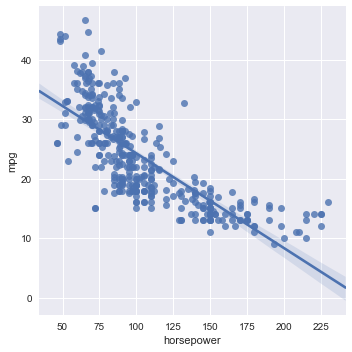

In [13]:
df = pd.concat([auto['horsepower'], auto['mpg']], axis=1)
ax = sns.lmplot(x='horsepower', y='mpg', data=df)
ax.plot(auto['horsepower'], y_pred);

# ISLR Questão 8(c)

In [14]:
def lm_stats(X, y, y_pred):

    try: 
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)
    
    
    residuals = np.array(y - y_pred)
    
    
    H = np.array(X @ np.linalg.inv(X.T @ X)) @ X.T
    
    # Leverage
    h_ii = H.diagonal()
    

    σi_est = []
    for i in range(X.shape[0]):
        
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)
    
    
    t = residuals / σi_est * np.sqrt(1 - h_ii)
    

   
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii, 
                         'studentised_residual': t,
                         'y_pred': y_pred})


def lm_plot(lm_stats_df): 
    
    
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']
        
    plt.figure(1, figsize=(16, 18))
    
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Valores ajustados')
    plt.ylabel('Resíduos de distribuição t de Student')
    plt.title('Visualização de resíduos pela distribuição t de Student', fontweight='bold')
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');
    
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Resíduos da distribuição t de Student')
    plt.title('Normal Q-Q', fontweight='bold')
    
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Valores ajustados')
    plt.ylabel('Resíduos padronizados')
    plt.title('Distribuição Normal', fontweight='bold')
    
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Alavancagem')
    plt.ylabel('Resíduos de distribuição t de Student')
    plt.title('Resíduos de distribuição t de Student X Alavancagem', fontweight='bold');

AttributeError: module 'seaborn' has no attribute 'scatterplot'

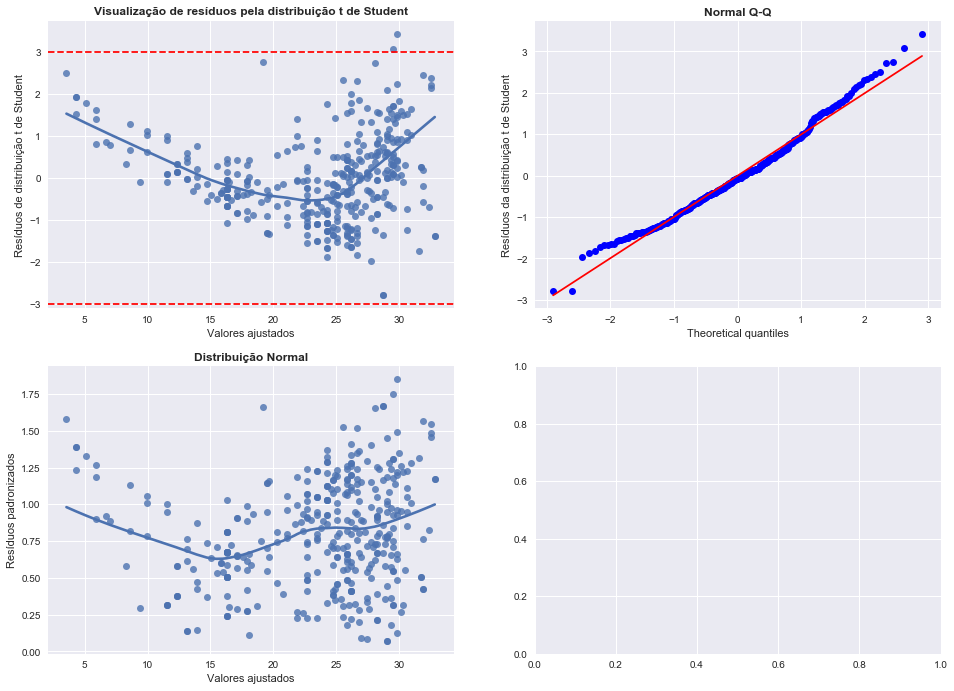

In [15]:
X = pd.concat([auto['horsepower']], axis=1)
intercept_const = pd.DataFrame({'intercept': np.ones(X.shape[0])})
X = np.array(pd.concat([intercept_const, X], axis=1))
y = auto['mpg']
lm_plot(lm_stats(X, y, y_pred))

In [19]:
# Apesar da falha na úlima visualização, os três gráficos obtidos apontam a ocorrência de não linearidade dos dados, com
# a presença de possíveis outliers

# ISLR Questão 9(a)

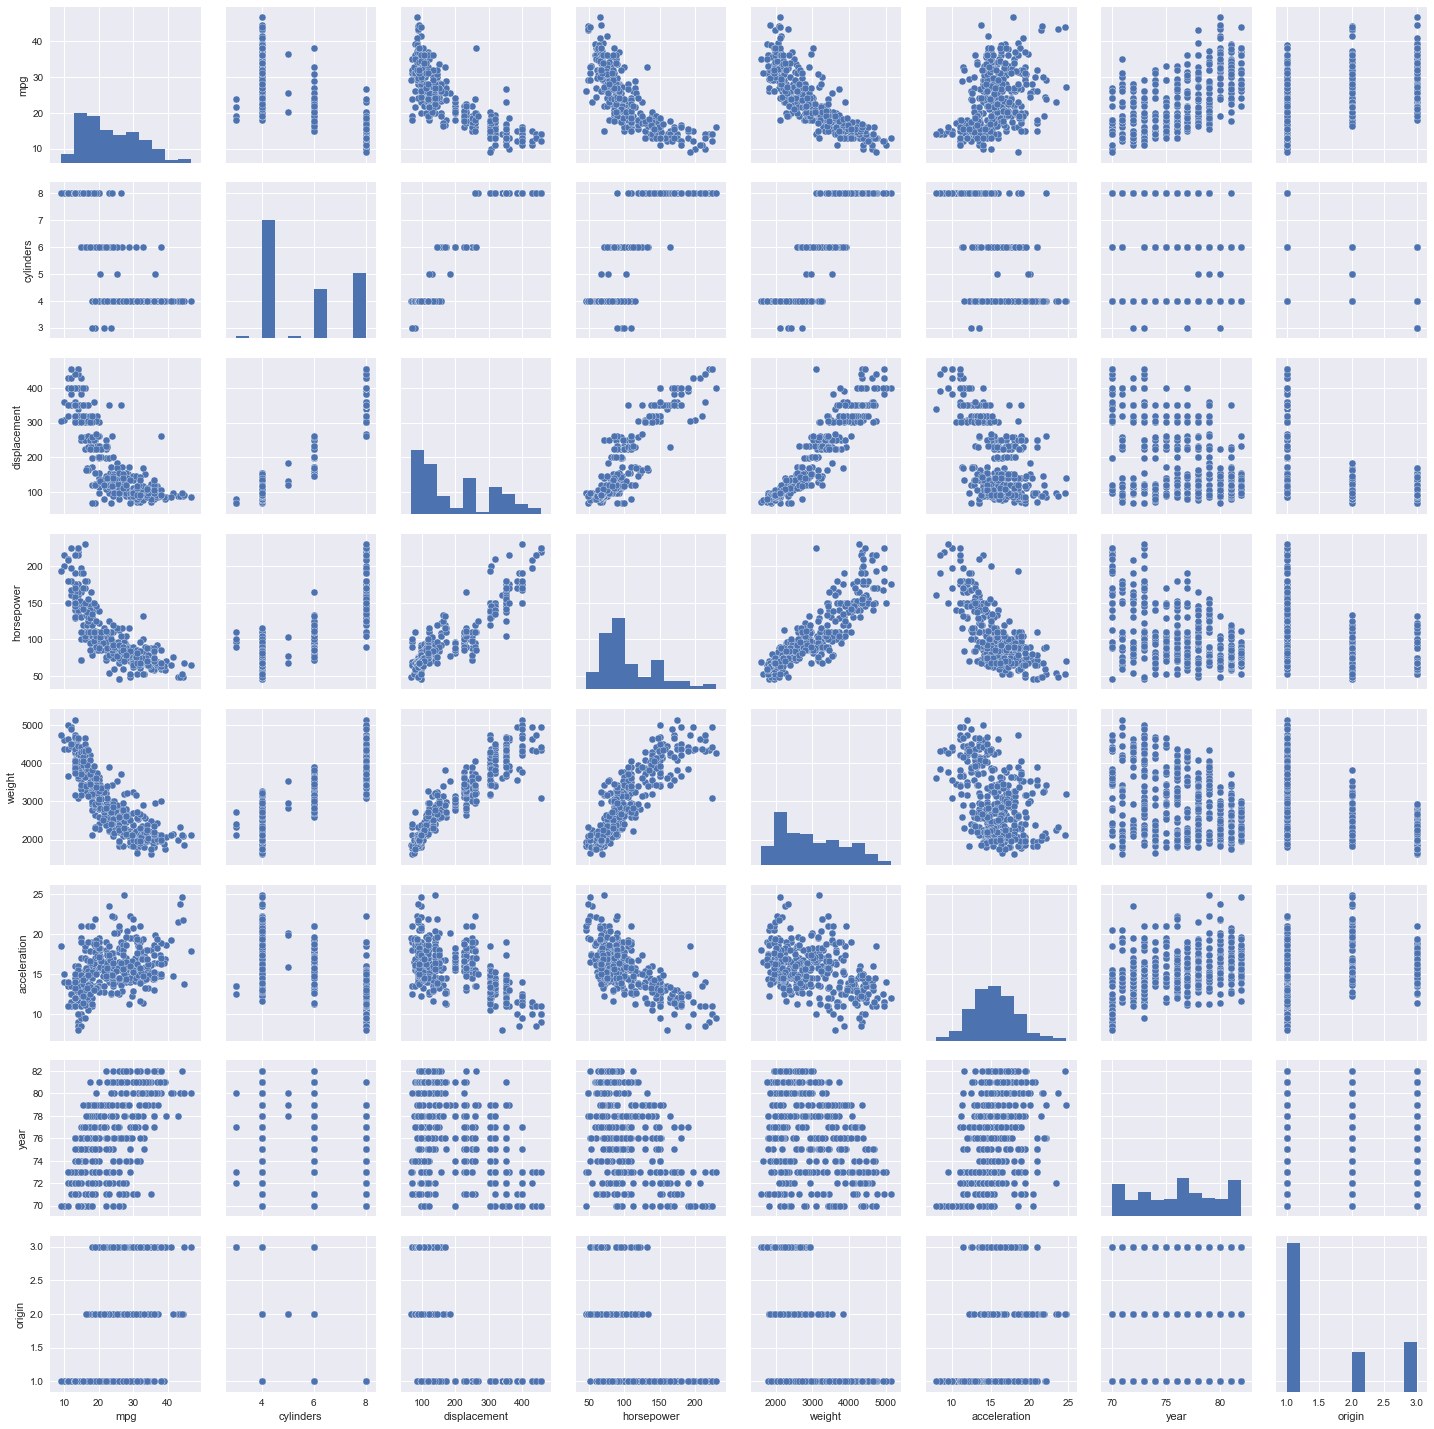

In [16]:
# Exibindo as matrizes de dispersão das variáveis do banco de dados Auto
sns.pairplot(auto);

# ISLR Exercício 9(b)

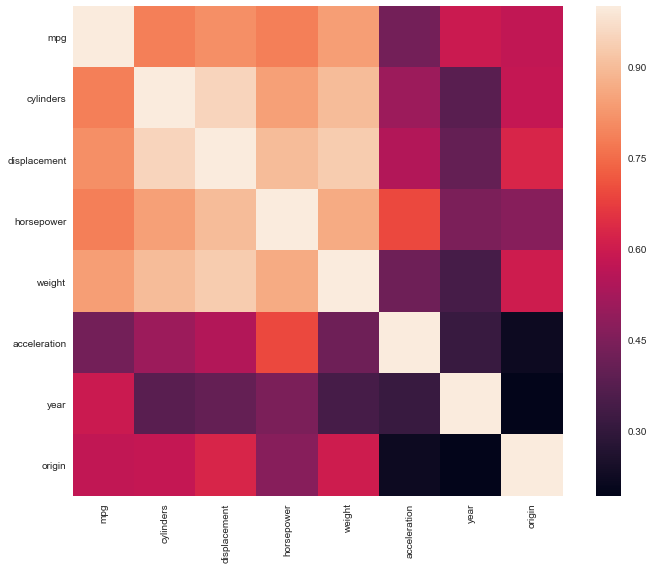

In [17]:
# Gerando matriz de correlações
corr_matrix = auto.corr().abs()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

# ISLR Exercício 9(c)

In [18]:
# Regressão linear múltipla com mpg como referência e, com exceção de name, com todas as demais variáveis como preditoras
f = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = patsy.dmatrices(f, auto, return_type='dataframe')

model = smf.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     218.0
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          5.52e-134
Time:                        09:49:30   Log-Likelihood:                -977.97
No. Observations:                 374   AIC:                             1974.
Df Residuals:                     365   BIC:                             2009.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -18.5396      4.923     -3.

In [19]:
model.pvalues[model.pvalues < 0.05].sort_values()

year              3.809700e-37
weight            1.241033e-21
C(origin)[T.3]    1.121234e-06
C(origin)[T.2]    8.932560e-06
Intercept         1.931709e-04
displacement      1.919994e-03
dtype: float64

In [ ]:
# Selecionamos acima os preditores com p-Valor inferior a 0,05. Isto sugere que podemos rejeitar a hipótese nula
# e afirmar que eles não possuem relação com mpg. Com relação à relação positiva, verifica-se que a referência
# cresce quando mpg cresce. Podemos inferir que automóveis com ano de fabricação mais recente são mais econômicos,
# percorrendo mais milhas com um galão de gasolina do que automóveis com ano de fabricação mais antigo.

# ISLR Exercício 9(d)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

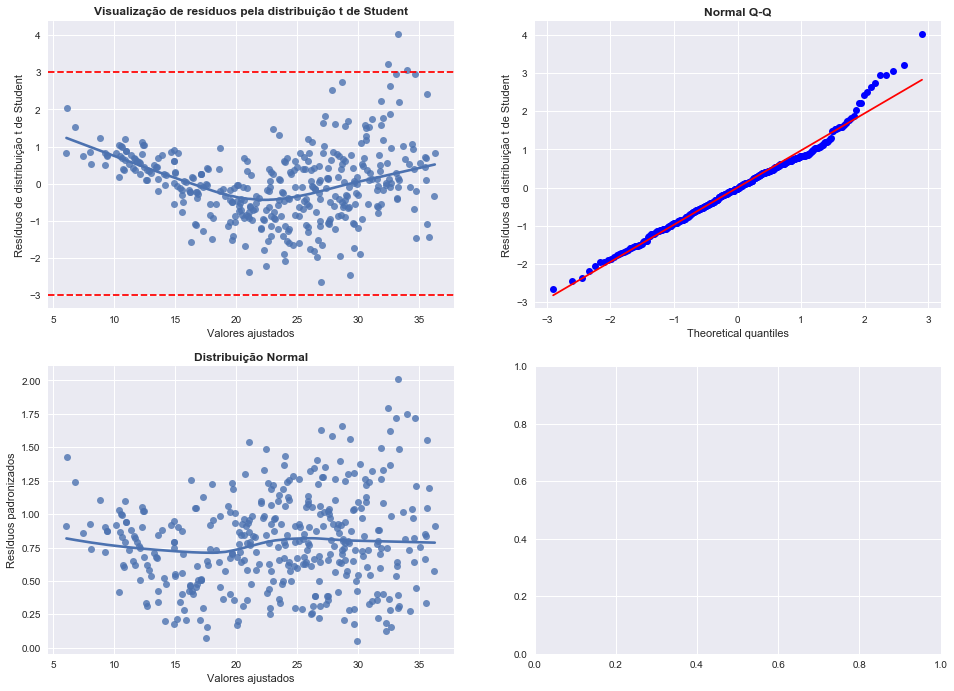

In [20]:
y_pred = np.array(model.predict(X))
lm_plot(lm_stats(X, y, y_pred))

In [ ]:
# O gráfico do alto à esquerda indica a presença de cinco outliers em potencial que estão além do limite de nossas
# predições. Já o gráfico do alto à direita, à exceção pelos altos valores residuais, apresenta uma distribuição
# homogênea. O gráfico inferior esquerdo sugere que uma aplicação de raiz quadrada reduz a não linearidade desta
# relação, permitindo ao nosso modelo um ajuste melhorado.

# ISLR Exercício 10(a)

In [27]:
# Regressão Linear Múltipla para predição de vendas com base nas variáveis price, urban e US

In [21]:
# O dataset não estava disponível no site do ISLR. Localizado um arquivo no GITHUB abaixo, cliquei em Raw e copiei o link

carseats = pd.read_csv('https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Carseats.csv').drop('Unnamed: 0', axis=1)
datatypes = {'quant': ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'],
             'qual': ['ShelveLoc', 'Urban', 'US']}
quants = carseats[datatypes['quant']].astype(np.float_)
carseats = pd.concat([quants, carseats[datatypes['qual']]], axis=1)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc,Urban,US
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,Bad,Yes,Yes
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,Good,Yes,Yes
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,Medium,Yes,Yes
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,Medium,Yes,Yes
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,Bad,Yes,No


In [22]:
f = 'Sales ~ Price + C(Urban) + C(US)'
y, X = patsy.dmatrices(f, carseats, return_type='dataframe')

model = smf.OLS(y, X).fit()
print(model.summary())

y_pred = np.array(model.predict(X))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           2.39e-23
Time:                        09:49:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.0435      0.651     

# ISLR Exercício 10(b)

In [ ]:
# Interpretação de cada coeficiente do modelo
# Para cada carro vendido com o acréscimo de Price em 1 unidade , há o decréscimo de 0,0545 em Sales.
# Há evidência de uma relação significativa entre Sales e o fato da loja ser nos EUA ou não
# Um p-Valor superior a 0,05 é indicativo de não haver uma relação significativa entre Sales e o fato de a loja
# estar ou não na zona rural

# ISLR Exercício 10(c)

In [ ]:
# y=13.0435+(−0.0219×Urban)+(1.2006×US)+(−0.0545×Price)

# ISLR Exercício 10(d)

In [39]:
# Price e US

# ISLR Exercício 10(e)

In [23]:
f = 'Sales ~ Price + C(US)'
y, X = patsy.dmatrices(f, carseats, return_type='dataframe')

model = smf.OLS(y, X).fit()
print(model.summary())


y_pred = np.array(model.predict(X))

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           2.66e-24
Time:                        09:49:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0308      0.631     20.652   

# ISLR Exercício 10(f)

AttributeError: module 'seaborn' has no attribute 'scatterplot'

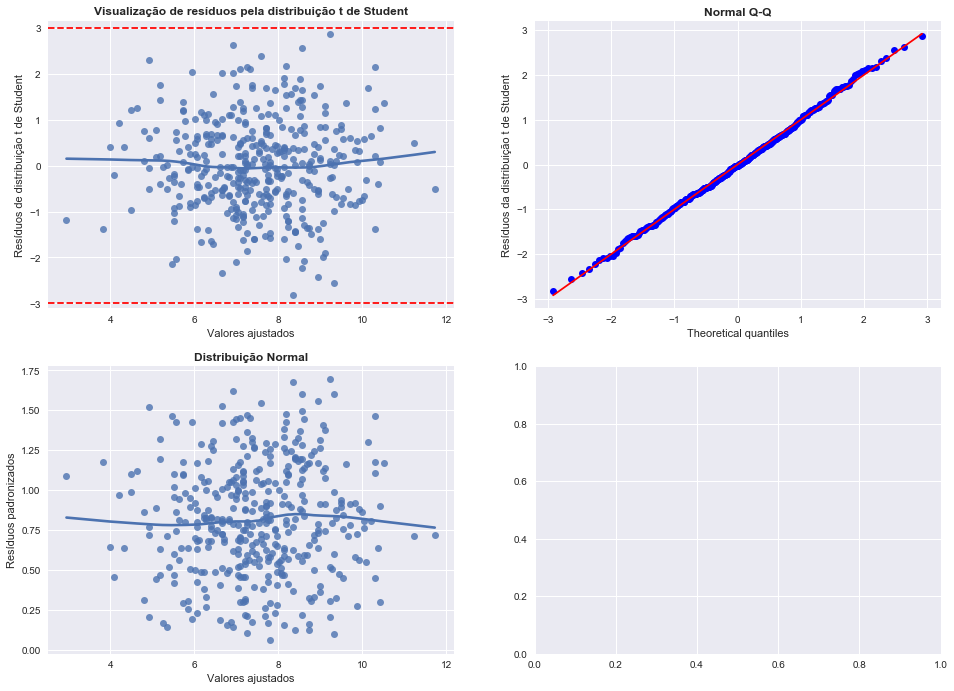

In [24]:
# Cruzando os modelos gerados nas questões 10(a) e 10(b)

lm_plot(lm_stats(X, y, y_pred))

In [ ]:
# O sutil padrão percebido no gráfico do alto à esquerda indica que nosso modelo se ajustou consideravelmente aos dados

# ISLR Exercício 10(g)

In [25]:
# Intervalo de confiança com base no modelo do exercício 10(e)
conf_inter_95 = model.conf_int(alpha=0.05)
conf_inter_95.rename(index=str, columns={0: "min.", 1: "max.",})

,min.,max.
Intercept,11.79032,14.271265
C(US)[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


# ISLR Exercício 10(h)

In [ ]:
# Como não se identifica uma variação superior a 3 entre os intervalos máximo e mínimo, não há registro de outliers

# ISLR Exercício 13(a)

In [26]:
np.random.seed(1)

mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

# ISLR Exercício 13(b)

In [27]:
mu, sigma = 0, 0.25
eps = np.random.normal(mu, sigma, 100)

# ISLR Exercício 13(c)

In [28]:
y = -1 + 0.5*x + eps

## β0 = -1

## β1 = 0.5

In [29]:
print('y length: ' + str(np.linalg.norm(y)))

y length: 10.660986158906175


# ISLR Exercício 13(d)

In [30]:
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')

AttributeError: module 'seaborn' has no attribute 'scatterplot'

### Mesmo após inúmeras tentativas, não foi possível atualizar o módulo seaborn para a versão 0.9 (que
### contém a funcionalidade scatterplot)

## ISLR Exercício 13(e)

In [31]:
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           5.39e-36
Time:                        10:00:12   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

##### β0 = −0.9632
##### β1 =0.5239
##### São valores muito próximo dos reais que são estimados pelo modelo. Tanto intercept quanto gradiente estão superestimados

# ISLR Exercício 13(f)

In [33]:
y_pred = model.predict()
y_act  = -1+(0.5*x)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares', 'Population regression']);

TypeError: lmplot() missing 1 required positional argument: 'data'

<Figure size 576x576 with 0 Axes>

#### Idem limitação descrita na questão 13(d)

# Os demais itens do exercício não puderam ser executados face à limitação (não superada) do seaborn
